In [1493]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [1494]:
df = pd.read_csv('co2_final.csv')
df.head()

,country,year,gdp,population,energy_per_capita,coal_co2,oil_co2,gas_co2,total_ghg,methane,cement_co2,co2
0,Argentina,1990,3.390000e+11,32755907,15718.703,3.140,59.188,43.213,312.334,122.548,1.822,112.149
1,Argentina,1991,3.760000e+11,33230292,15747.927,2.939,61.233,47.284,346.004,122.050,2.196,117.755
2,Argentina,1992,4.170000e+11,33693532,16661.842,3.107,63.633,48.303,342.419,124.153,2.495,121.535
3,Argentina,1993,4.450000e+11,34152718,16981.766,2.528,67.152,40.807,335.297,123.987,2.761,118.001
4,Argentina,1994,4.730000e+11,34613491,17651.035,3.561,67.203,42.677,337.789,125.816,3.050,118.469


In [1495]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 782 rows and 12 columns


In [1496]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            782 non-null    object 
 1   year               782 non-null    int64  
 2   gdp                759 non-null    float64
 3   population         782 non-null    int64  
 4   energy_per_capita  782 non-null    float64
 5   coal_co2           782 non-null    float64
 6   oil_co2            782 non-null    float64
 7   gas_co2            782 non-null    float64
 8   total_ghg          782 non-null    float64
 9   methane            782 non-null    float64
 10  cement_co2         782 non-null    float64
 11  co2                782 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 73.4+ KB


In [1497]:
df.describe()

,year,gdp,population,energy_per_capita,coal_co2,oil_co2,gas_co2,total_ghg,methane,cement_co2,co2
count,782.000000,7.590000e+02,7.820000e+02,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,2006.500000,2.629292e+12,1.811447e+08,46481.935476,453.022536,322.428182,173.767136,1433.843182,238.088037,36.020409,1002.396238
std,9.816987,3.882162e+12,3.397862e+08,30339.615305,1163.759358,487.779176,297.196012,2184.966012,337.854579,110.304634,1803.527240
min,1990.000000,1.210000e+11,4.241438e+06,2643.110000,0.000000,18.582000,1.388000,45.218000,9.626000,0.361000,27.265000
25%,1998.000000,5.750000e+11,2.824288e+07,19713.098750,22.934750,77.978000,21.237250,392.246250,43.422000,3.803250,237.030000
50%,2006.500000,1.550000e+12,6.008198e+07,44370.902500,93.407500,201.145500,84.224500,661.051500,97.251500,12.467000,430.584000
75%,2015.000000,2.595000e+12,1.446025e+08,65113.243500,359.400250,311.964750,162.803250,1368.849750,239.597250,24.747250,735.459750
max,2023.000000,2.700000e+13,1.438070e+09,129848.781000,8550.844000,2642.556000,1755.923000,13968.915000,1886.240000,849.976000,11902.503000


### Check for missing values in gdp

In [1498]:
df[df['gdp'].isnull()]

,country,year,gdp,population,energy_per_capita,coal_co2,oil_co2,gas_co2,total_ghg,methane,cement_co2,co2
33,Argentina,2023,NaN,45538402,22277.793,4.106,93.742,91.051,422.011,128.234,4.853,195.806
67,Australia,2023,NaN,26451125,63256.879,142.666,141.596,74.636,580.988,113.681,2.818,382.972
101,Brazil,2023,NaN,211140731,17806.445,54.848,326.432,56.329,2381.904,611.426,24.963,486.470
135,Canada,2023,NaN,39299099,99916.398,36.769,248.853,237.269,800.006,109.381,6.752,549.299
169,China,2023,NaN,1422584937,33266.828,8550.844,1642.827,814.783,13968.915,1886.240,718.017,11902.503
203,Denmark,2023,NaN,5948134,33078.332,2.766,19.319,3.602,45.218,10.829,1.073,27.265
237,Finland,2023,NaN,5601185,59896.703,8.834,18.704,2.851,79.206,10.611,0.597,31.622
271,France,2023,NaN,66438828,37164.297,19.636,174.553,66.651,334.278,67.723,6.397,272.476
305,Germany,2023,NaN,84548234,38052.270,188.477,231.622,155.461,670.626,61.377,10.604,596.151
339,India,2023,NaN,1438069597,7586.200,2032.012,717.799,132.420,4196.449,940.655,177.226,3062.324


So, data for 2023 is missing for all countries.

### Impute missing values

In [1499]:
# Create a copy of the dataframe
data = df.copy()
data_gdp = data.loc[:, ['country', 'year', 'gdp']]
data.drop('gdp', axis = 1, inplace = True)

In [1500]:
# Pivot the DataFrame to have countries as columns and years as rows
data_gdp_pivoted = data_gdp.pivot(index='year', columns='country', values='gdp')

# Fill the missing values using linear interpolation
data_gdp_filled = data_gdp_pivoted.interpolate(method='linear')

# Reset the index and rename the columns
data_gdp = data_gdp_filled.reset_index()

In [1501]:
# unpivot data_gdp
data_gdp = data_gdp.melt(id_vars = 'year', var_name = 'country', value_name='gdp')

In [1502]:
data_gdp = data_gdp.reset_index()

In [1503]:
data_gdp.drop('index',axis = 1, inplace = True)

In [1504]:
data_gdp.head()

,year,country,gdp
0,1990,Argentina,3.390000e+11
1,1991,Argentina,3.760000e+11
2,1992,Argentina,4.170000e+11
3,1993,Argentina,4.450000e+11
4,1994,Argentina,4.730000e+11


In [1505]:
data_gdp.shape

(782, 3)

In [1506]:
data = pd.merge(left = data, right = data_gdp, how = 'inner', on = ['country', 'year'])

### Adding data for Renewable Energy Consumption, Urban population and Agricultural value added

Agriculture: Tubiello, F. N., et al. (2015). "The Contribution of Agriculture, Forestry and other Land Use activities to Global Warming, 1990–2012." Global Change Biology, 21(7), 2655-2660.

Urbanization: Wang, S., Li, G., & Fang, C. (2018). "Urbanization, economic growth, energy consumption, and CO₂ emissions: Empirical evidence from countries with different income levels." Renewable and Sustainable Energy Reviews, 81, 2144-2159.

Renewable Energy: Shafiei, S., & Salim, R. A. (2014). "Non-renewable and renewable energy consumption and CO₂ emissions in OECD countries: A comparative analysis." Energy Policy, 66, 547-556.

#### Read and preprocess Renewable Energy Data

In [1507]:
renew = pd.read_csv('Renewable.csv')
renew.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.900000,6.700000,7.000000,6.800000,8.600000,8.300000,9.100000,8.8,8.8,NaN
1,Africa Eastern and Southern,AFE,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,61.499577,62.128338,62.457688,61.891132,62.242631,63.387090,66.123449,NaN,NaN,NaN
2,Afghanistan,AFG,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,19.100000,17.700000,20.200000,19.500000,18.300000,18.900000,18.200000,20.0,20.0,NaN
3,Africa Western and Central,AFW,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,76.135802,76.689160,76.283383,76.413082,75.960030,75.328928,76.102819,NaN,NaN,NaN
4,Angola,AGO,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,47.500000,47.100000,48.100000,52.500000,52.500000,51.000000,60.100000,52.9,NaN,NaN


In [1508]:
renew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

### Data Preparation

In [1509]:
# drop Indicator Name and Indicator Code as they are of no use
renew = renew.drop(['Indicator Name', 'Indicator Code'], axis = 1)
# convert data to proper format -> bring years from column headers to a single column year
renew = renew.melt(id_vars=['Country Name', 'Country Code'], var_name='year', value_name='renewable_energy_pct')
# convert year column to int data type
renew['year'] = renew['year'].astype(int)
# rename column Country Name to country
renew.rename(columns = {'Country Name' : 'country'}, inplace = True)

In [1510]:
# filter the data for 1990 to 2022 for g20 and 4 nordic countries
renew = renew[(renew['year'] >= 1990) & (renew['year'] <= 2023)]
countries_to_keep = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Mexico',
                     'Russian Federation', 'Korea, Rep.', 'Saudi Arabia',  'South Africa', 'Turkiye', 'United Kingdom', 'United States', 'Denmark',
                     'Norway', 'Sweden', 'Finland']
renew = renew[renew['country'].isin(countries_to_keep)]

In [1511]:
renew['country'].nunique()

23

In [1512]:
renew['country'].unique()

array(['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'Germany',
       'Denmark', 'Finland', 'France', 'United Kingdom', 'Indonesia',
       'India', 'Italy', 'Japan', 'Korea, Rep.', 'Mexico', 'Norway',
       'Russian Federation', 'Saudi Arabia', 'Sweden', 'Turkiye',
       'United States', 'South Africa'], dtype=object)

In [1513]:
renew

,country,Country Code,year,renewable_energy_pct
7989,Argentina,ARG,1990,8.6
7993,Australia,AUS,1990,8.0
8009,Brazil,BRA,1990,49.8
8015,Canada,CAN,1990,22.6
8020,China,CHN,1990,33.9
...,...,...,...,...
16963,Saudi Arabia,SAU,2023,NaN
16981,Sweden,SWE,2023,NaN
17002,Turkiye,TUR,2023,NaN
17009,United States,USA,2023,NaN


In [1514]:
renew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, 7989 to 17021
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               782 non-null    object 
 1   Country Code          782 non-null    object 
 2   year                  782 non-null    int32  
 3   renewable_energy_pct  736 non-null    float64
dtypes: float64(1), int32(1), object(2)
memory usage: 27.5+ KB


There seems to be missing values in the renewables dataset

In [1515]:
renew['renewable_energy_pct'].isnull().sum()

46

Inspecting the missing values

In [1516]:
renew[renew['renewable_energy_pct'].isnull()]

,country,Country Code,year,renewable_energy_pct
16501,Argentina,ARG,2022,NaN
16505,Australia,AUS,2022,NaN
16521,Brazil,BRA,2022,NaN
16527,Canada,CAN,2022,NaN
16532,China,CHN,2022,NaN
16547,Germany,DEU,2022,NaN
16550,Denmark,DNK,2022,NaN
16567,Finland,FIN,2022,NaN
16569,France,FRA,2022,NaN
16573,United Kingdom,GBR,2022,NaN


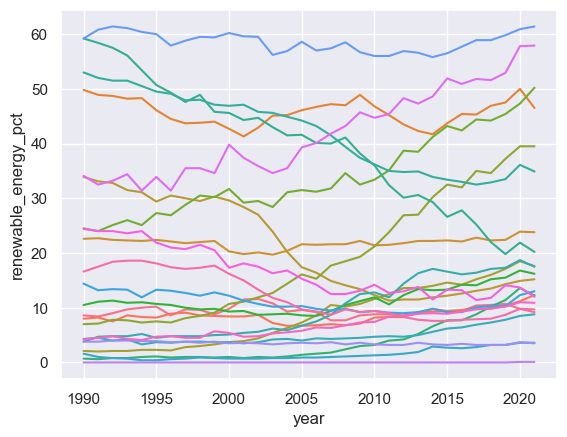

In [1517]:

sns.lineplot(x = 'year', y = 'renewable_energy_pct', data = renew, hue = 'country', legend = False)
plt.show()

The data seems to be missing for all G20 and Nordic countries for both 2022 and 2023. Given that data is missing for both the years for all these countries, the data might not be missing at random.

Since the data for most  of the countries follows a specific trend, linear interpolation would be the most appropriate method for missing value imputation in this case as it would be able to incorporate missing values by capturing the trend in the data

In [1518]:
df_country = renew[['country', 'Country Code']].drop_duplicates()

In [1519]:
df_country

,country,Country Code
7989,Argentina,ARG
7993,Australia,AUS
8009,Brazil,BRA
8015,Canada,CAN
8020,China,CHN
8035,Germany,DEU
8038,Denmark,DNK
8055,Finland,FIN
8057,France,FRA
8061,United Kingdom,GBR


#### Imputing missing values

In [1520]:
# Pivot the DataFrame to have countries as columns and years as rows
renew_pivoted = renew.pivot(index='year', columns='country', values='renewable_energy_pct')

# Fill the missing values using linear interpolation
renew_filled = renew_pivoted.interpolate(method='linear')

# Reset the index and rename the columns
renew = renew_filled.reset_index()

In [1521]:
renew.head()

country,year,Argentina,Australia,Brazil,Canada,China,Denmark,Finland,France,Germany,...,"Korea, Rep.",Mexico,Norway,Russian Federation,Saudi Arabia,South Africa,Sweden,Turkiye,United Kingdom,United States
0,1990,8.6,8.0,49.8,22.6,33.9,7.0,24.5,10.5,2.1,...,1.6,14.4,59.2,3.8,0.0,16.6,34.1,24.4,0.7,4.2
1,1991,8.4,8.2,48.9,22.7,33.1,7.1,24.0,11.1,2.0,...,1.0,13.2,60.8,3.8,0.0,17.5,32.5,24.0,0.6,4.5
2,1992,9.0,7.5,48.7,22.4,32.8,7.8,25.1,11.3,2.1,...,0.8,13.4,61.4,4.0,0.0,18.4,33.2,24.0,0.8,4.8
3,1993,9.7,8.6,48.2,22.3,31.5,7.7,26.0,10.9,2.1,...,0.7,13.3,61.1,4.0,0.0,18.6,34.4,23.6,0.8,4.3
4,1994,10.0,8.3,48.3,22.2,31.1,7.3,25.1,11.0,2.3,...,0.4,11.9,60.4,3.9,0.0,18.6,31.4,24.0,1.0,4.1


In [1522]:
renew.index

RangeIndex(start=0, stop=34, step=1)

In [1523]:
renew = renew.melt(id_vars = 'year', var_name = 'country', value_name='renewable_energy_pct')

In [1524]:
renew.head()

,year,country,renewable_energy_pct
0,1990,Argentina,8.6
1,1991,Argentina,8.4
2,1992,Argentina,9.0
3,1993,Argentina,9.7
4,1994,Argentina,10.0


In [1525]:
renew.tail()

,year,country,renewable_energy_pct
777,2019,United States,10.2
778,2020,United States,11.0
779,2021,United States,10.9
780,2022,United States,10.9
781,2023,United States,10.9


In [1526]:
# Check if all the missing values have been filled
renew.isnull().sum()

year                    0
country                 0
renewable_energy_pct    0
dtype: int64

Now join the country code column with the renew dataframe

In [1527]:
renew.merge(df_country, on = 'country', how = 'right')

,year,country,renewable_energy_pct,Country Code
0,1990,Argentina,8.6,ARG
1,1991,Argentina,8.4,ARG
2,1992,Argentina,9.0,ARG
3,1993,Argentina,9.7,ARG
4,1994,Argentina,10.0,ARG
...,...,...,...,...
777,2019,South Africa,8.7,ZAF
778,2020,South Africa,9.8,ZAF
779,2021,South Africa,9.7,ZAF
780,2022,South Africa,9.7,ZAF


### Read and preprocess Urbanization data

In [1528]:
urb = pd.read_csv('Urbanization.csv')
urb.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,...,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000,44.052000,44.254000
1,Africa Eastern and Southern,AFE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,14.563810,14.811410,15.069249,15.347976,15.640195,15.941282,...,33.936963,34.425584,34.894753,35.358901,35.847598,36.336259,36.828302,37.323699,37.825158,38.335337
2,Afghanistan,AFG,Urban population (% of total population),SP.URB.TOTL.IN.ZS,8.401000,8.684000,8.976000,9.276000,9.586000,9.904000,...,24.587000,24.803000,25.020000,25.250000,25.495000,25.754000,26.026000,26.314000,26.616000,26.933000
3,Africa Western and Central,AFW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,14.705391,15.090123,15.484076,15.897592,16.329208,16.778650,...,44.180175,44.805863,45.425066,46.039478,46.649426,47.255413,47.857831,48.454806,49.047385,49.635410
4,Angola,AGO,Urban population (% of total population),SP.URB.TOTL.IN.ZS,10.435000,10.798000,11.204000,11.624000,12.058000,12.504000,...,62.731000,63.446000,64.149000,64.839000,65.514000,66.177000,66.825000,67.460000,68.081000,68.688000


### Data Preparation

In [1529]:
# drop Indicator Name and Indicator Code as they are of no use
urb = urb.drop(['Indicator Name', 'Indicator Code'], axis = 1)
# convert data to proper format -> bring years from column headers to a single column year
urb = urb.melt(id_vars=['Country Name', 'Country Code'], var_name='year', value_name='urbanization_pct')
# convert year column to int data type
urb['year'] = urb['year'].astype(int)
# rename column Country Name to country
urb.rename(columns = {'Country Name' : 'country'}, inplace = True)

In [1530]:
# filter the data for 1990 to 2022 for g20 and 4 nordic countries
urb = urb[(urb['year'] >= 1990) & (urb['year'] <= 2023)]
countries_to_keep = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Mexico',
                     'Russian Federation', 'Korea, Rep.', 'Saudi Arabia',  'South Africa', 'Turkiye', 'United Kingdom', 'United States', 'Denmark',
                     'Norway', 'Sweden', 'Finland']
urb = urb[urb['country'].isin(countries_to_keep)]

In [1531]:
urb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, 7989 to 17021
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           782 non-null    object 
 1   Country Code      782 non-null    object 
 2   year              782 non-null    int32  
 3   urbanization_pct  782 non-null    float64
dtypes: float64(1), int32(1), object(2)
memory usage: 27.5+ KB


### Read and preprocess Agriculture data

In [1532]:
agri = pd.read_csv('Agriculture_allied.csv')
agri.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.014813,0.012520,0.018612,0.023919,0.022253,0.027573,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,11.958331,12.850750,12.994822,12.643375,11.913567,12.632486,14.643340,13.402833,13.891834,14.667492
2,Afghanistan,AFG,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.137041,20.634323,25.740314,26.420199,22.042897,25.773971,29.975583,33.597619,33.701432,NaN
3,Africa Western and Central,AFW,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,19.223689,20.242095,20.527083,20.383873,20.464235,20.637680,22.340513,21.567748,21.866302,21.302691
4,Angola,AGO,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.547057,9.122534,9.831169,10.016996,8.607742,7.882625,9.946544,11.486345,13.737789,14.920040


In [1533]:
# drop Indicator Name and Indicator Code as they are of no use
agri = agri.drop(['Indicator Name', 'Indicator Code'], axis = 1)
# convert data to proper format -> bring years from column headers to a single column year
agri = agri.melt(id_vars=['Country Name', 'Country Code'], var_name='year', value_name='agri_value_added')
# convert year column to int data type
agri['year'] = agri['year'].astype(int)
# rename column Country Name to country
agri.rename(columns = {'Country Name' : 'country'}, inplace = True)

In [1534]:
# filter the data for 1990 to 2022 for g20 and 4 nordic countries
agri = agri[(agri['year'] >= 1990) & (agri['year'] <= 2023)]
countries_to_keep = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Mexico',
                     'Russian Federation', 'Korea, Rep.', 'Saudi Arabia',  'South Africa', 'Turkiye', 'United Kingdom', 'United States', 'Denmark',
                     'Norway', 'Sweden', 'Finland']
agri = agri[agri['country'].isin(countries_to_keep)]

In [1535]:
agri.info()

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, 7989 to 17021
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           782 non-null    object 
 1   Country Code      782 non-null    object 
 2   year              782 non-null    int32  
 3   agri_value_added  757 non-null    float64
dtypes: float64(1), int32(1), object(2)
memory usage: 27.5+ KB


In [1536]:
agri[agri['agri_value_added'].isnull()]

,country,Country Code,year,agri_value_added
8015,Canada,CAN,1990,NaN
8035,Germany,DEU,1990,NaN
8099,Japan,JPN,1990,NaN
8231,United States,USA,1990,NaN
8281,Canada,CAN,1991,NaN
8365,Japan,JPN,1991,NaN
8497,United States,USA,1991,NaN
8547,Canada,CAN,1992,NaN
8631,Japan,JPN,1992,NaN
8763,United States,USA,1992,NaN


Fill missing values for agri dataframe

Create separate dataframe for country and country code to join country code later with the main dataframe

In [1537]:
agri_country = agri[['country', 'Country Code']].drop_duplicates()

In [1538]:
# Pivot the DataFrame to have countries as columns and years as rows
agri_pivoted = agri.pivot(index='year', columns='country', values='agri_value_added')

# Fill the missing values using linear interpolation
agri_filled = agri_pivoted.interpolate(method='linear')

# Reset the index and rename the columns
agri = agri_filled.reset_index()

Convert the dataframe back into the long format

In [1539]:
agri = agri.melt(id_vars = 'year', var_name = 'country', value_name='agri_value_added')

In [1540]:
agri.head()

,year,country,agri_value_added
0,1990,Argentina,8.123676
1,1991,Argentina,6.716492
2,1992,Argentina,5.990787
3,1993,Argentina,5.136826
4,1994,Argentina,5.082668


In [1541]:
agri.isnull().sum()

year                 0
country              0
agri_value_added    19
dtype: int64

In [1542]:
agri[agri['agri_value_added'].isnull()]

,year,country,agri_value_added
102,1990,Canada,NaN
103,1991,Canada,NaN
104,1992,Canada,NaN
105,1993,Canada,NaN
106,1994,Canada,NaN
107,1995,Canada,NaN
108,1996,Canada,NaN
272,1990,Germany,NaN
408,1990,Japan,NaN
409,1991,Japan,NaN


For the missing values in the initial years I would use limit_direction = 'backward' while doing linear interpolation

In [1543]:
# Pivot the DataFrame to have countries as columns and years as rows
agri_pivoted = agri.pivot(index='year', columns='country', values='agri_value_added')

# Fill the missing values using linear interpolation
agri_filled = agri_pivoted.interpolate(method='linear', limit_direction = 'backward')

# Reset the index and rename the columns
agri = agri_filled.reset_index()

Convert it back into long format

In [1544]:
agri = agri.melt(id_vars = 'year', var_name = 'country', value_name='agri_value_added')

Check if any missing values present

In [1545]:
agri.isnull().sum()

year                0
country             0
agri_value_added    0
dtype: int64

In [1546]:
agri.merge(agri_country, on = 'country', how = 'right')

,year,country,agri_value_added,Country Code
0,1990,Argentina,8.123676,ARG
1,1991,Argentina,6.716492,ARG
2,1992,Argentina,5.990787,ARG
3,1993,Argentina,5.136826,ARG
4,1994,Argentina,5.082668,ARG
...,...,...,...,...
777,2019,South Africa,1.950321,ZAF
778,2020,South Africa,2.582420,ZAF
779,2021,South Africa,2.557299,ZAF
780,2022,South Africa,2.830275,ZAF


### Merge renew, urb and agri dataframes with the main dataframe df

In [1547]:
# Merge renew and df
df_renew = pd.merge(left = data, right = renew, how = 'inner', on = ['country', 'year'])

In [1548]:
df_renew.head()

,country,year,population,energy_per_capita,coal_co2,oil_co2,gas_co2,total_ghg,methane,cement_co2,co2,gdp,renewable_energy_pct
0,Argentina,1990,32755907,15718.703,3.140,59.188,43.213,312.334,122.548,1.822,112.149,3.390000e+11,8.6
1,Argentina,1991,33230292,15747.927,2.939,61.233,47.284,346.004,122.050,2.196,117.755,3.760000e+11,8.4
2,Argentina,1992,33693532,16661.842,3.107,63.633,48.303,342.419,124.153,2.495,121.535,4.170000e+11,9.0
3,Argentina,1993,34152718,16981.766,2.528,67.152,40.807,335.297,123.987,2.761,118.001,4.450000e+11,9.7
4,Argentina,1994,34613491,17651.035,3.561,67.203,42.677,337.789,125.816,3.050,118.469,4.730000e+11,10.0


Check the shape to ensure there are no duplicates after joining.

In [1549]:
df_renew.shape

(782, 13)

In [1550]:
# Merge df_renew and urb
df_renew_urb = pd.merge(left = df_renew, right = urb, how = 'inner', on = ['country', 'year'])

In [1551]:
# Merge df_renew_urb and agri
df_co2 = pd.merge(left = df_renew_urb, right = agri, how = 'inner', on = ['country', 'year'])

In [1552]:
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               782 non-null    object 
 1   year                  782 non-null    int64  
 2   population            782 non-null    int64  
 3   energy_per_capita     782 non-null    float64
 4   coal_co2              782 non-null    float64
 5   oil_co2               782 non-null    float64
 6   gas_co2               782 non-null    float64
 7   total_ghg             782 non-null    float64
 8   methane               782 non-null    float64
 9   cement_co2            782 non-null    float64
 10  co2                   782 non-null    float64
 11  gdp                   782 non-null    float64
 12  renewable_energy_pct  782 non-null    float64
 13  Country Code          782 non-null    object 
 14  urbanization_pct      782 non-null    float64
 15  agri_value_added      7

## Exploratory Data Analysis

Visualizing relationship between variables

1. Summary Statistics

In [1553]:
df_co2.describe()

,year,population,energy_per_capita,coal_co2,oil_co2,gas_co2,total_ghg,methane,cement_co2,co2,gdp,renewable_energy_pct,urbanization_pct,agri_value_added
count,782.000000,7.820000e+02,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,7.820000e+02,782.000000,782.000000,782.000000
mean,2006.500000,1.811447e+08,46481.935476,453.022536,322.428182,173.767136,1433.843182,238.088037,36.020409,1002.396238,2.677395e+12,18.937596,73.940820,4.745880
std,9.816987,3.397862e+08,30339.615305,1163.759358,487.779176,297.196012,2184.966012,337.854579,110.304634,1803.527240,3.984972e+12,17.082317,15.306099,5.250362
min,1990.000000,4.241438e+06,2643.110000,0.000000,18.582000,1.388000,45.218000,9.626000,0.361000,27.265000,1.210000e+11,0.000000,25.547000,0.544915
25%,1998.000000,2.824288e+07,19713.098750,22.934750,77.978000,21.237250,392.246250,43.422000,3.803250,237.030000,5.882500e+11,6.200000,72.032750,1.606930
50%,2006.500000,6.008198e+07,44370.902500,93.407500,201.145500,84.224500,661.051500,97.251500,12.467000,430.584000,1.565000e+12,12.000000,78.635500,2.602297
75%,2015.000000,1.446025e+08,65113.243500,359.400250,311.964750,162.803250,1368.849750,239.597250,24.747250,735.459750,2.620000e+12,30.450000,83.595500,5.496028
max,2023.000000,1.438070e+09,129848.781000,8550.844000,2642.556000,1755.923000,13968.915000,1886.240000,849.976000,11902.503000,2.700000e+13,61.400000,92.463000,27.662705


Visualize the trend of the target variable co2.

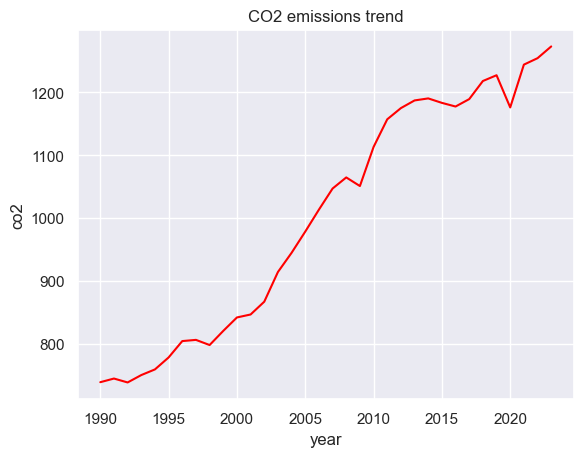

In [1612]:
sns.lineplot(x = 'year', y = 'co2', data = df_co2, color = 'red', errorbar = None)
plt.title('CO2 emissions trend')
plt.show()

2. Visualizing the distribution of key variables to check if they are skewed or require some transformation before modelling and check the relationship between different variables using pair plot.

* Visualizing distribution and relationship of energy related emission features with the target variable co2

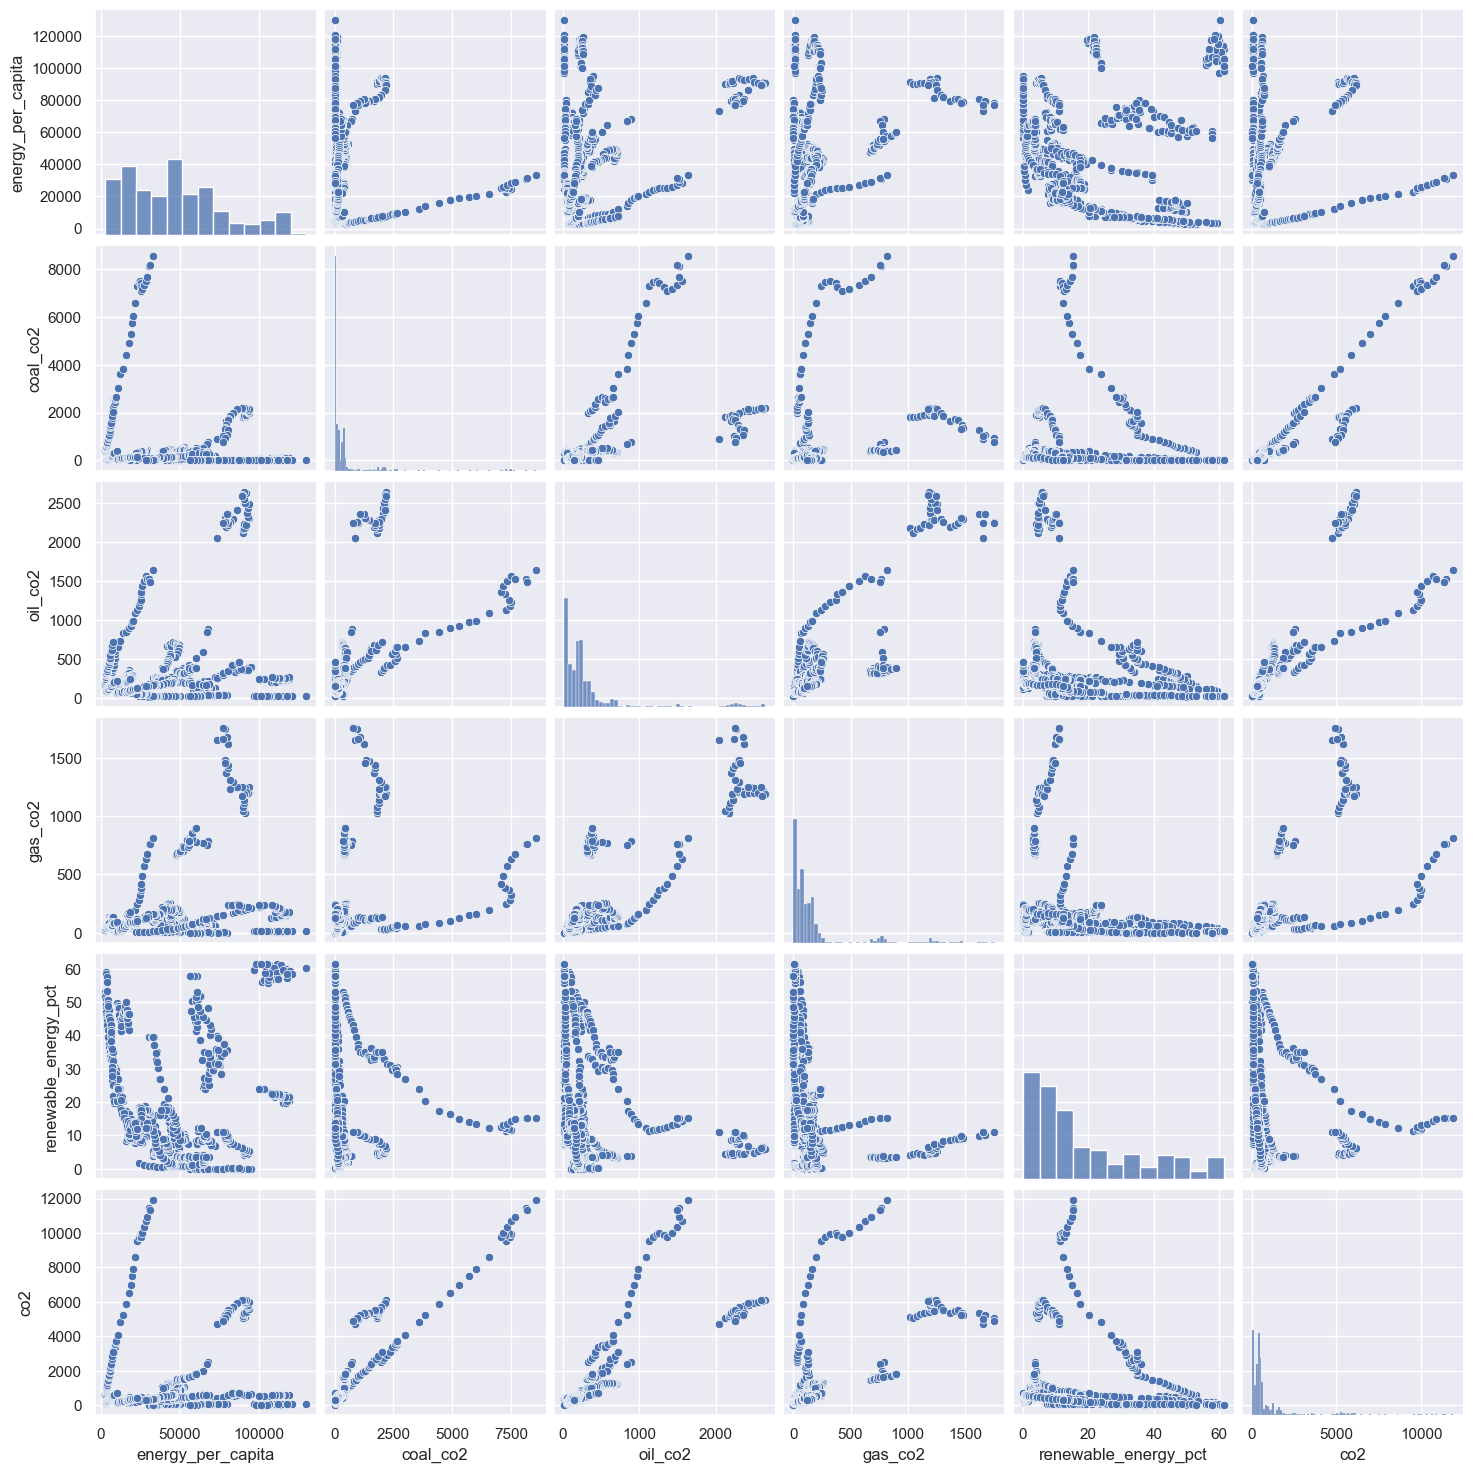

In [1554]:
sns.pairplot(df_co2[['energy_per_capita', 'coal_co2', 'oil_co2', 'gas_co2', 'renewable_energy_pct', 'co2']])
plt.show()

Observations

* coal_co2 and oil_co2 seems to be most correlated with the target variable co2 while other features seem to be weakly correlated.

Inspect the correlation heatmap to be get a clear picture of the correlation values for the energy related co2 emission features

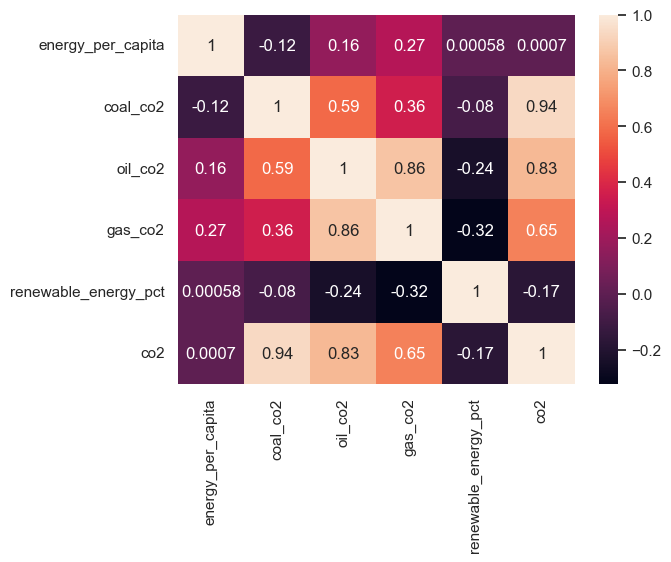

In [1555]:
sns.heatmap(df_co2[['energy_per_capita', 'coal_co2', 'oil_co2', 'gas_co2', 'renewable_energy_pct', 'co2']].corr(), annot = True)
plt.show()

In [1556]:
# Check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select the predictors for multicollinearity check
X = df_co2[['energy_per_capita', 'coal_co2', 'oil_co2', 'gas_co2', 'renewable_energy_pct']]

# Add a constant for the intercept term
X = add_constant(X)

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
vif_data


,Variable,VIF
0,const,5.167434
1,energy_per_capita,1.154518
2,coal_co2,1.817247
3,oil_co2,5.961469
4,gas_co2,4.894401
5,renewable_energy_pct,1.139062


In [1557]:
df_co2.drop('coal_co2', axis = 1, inplace = True)

* Visualizing distribution and relationship of trade and economy related emission features with the target variable co2

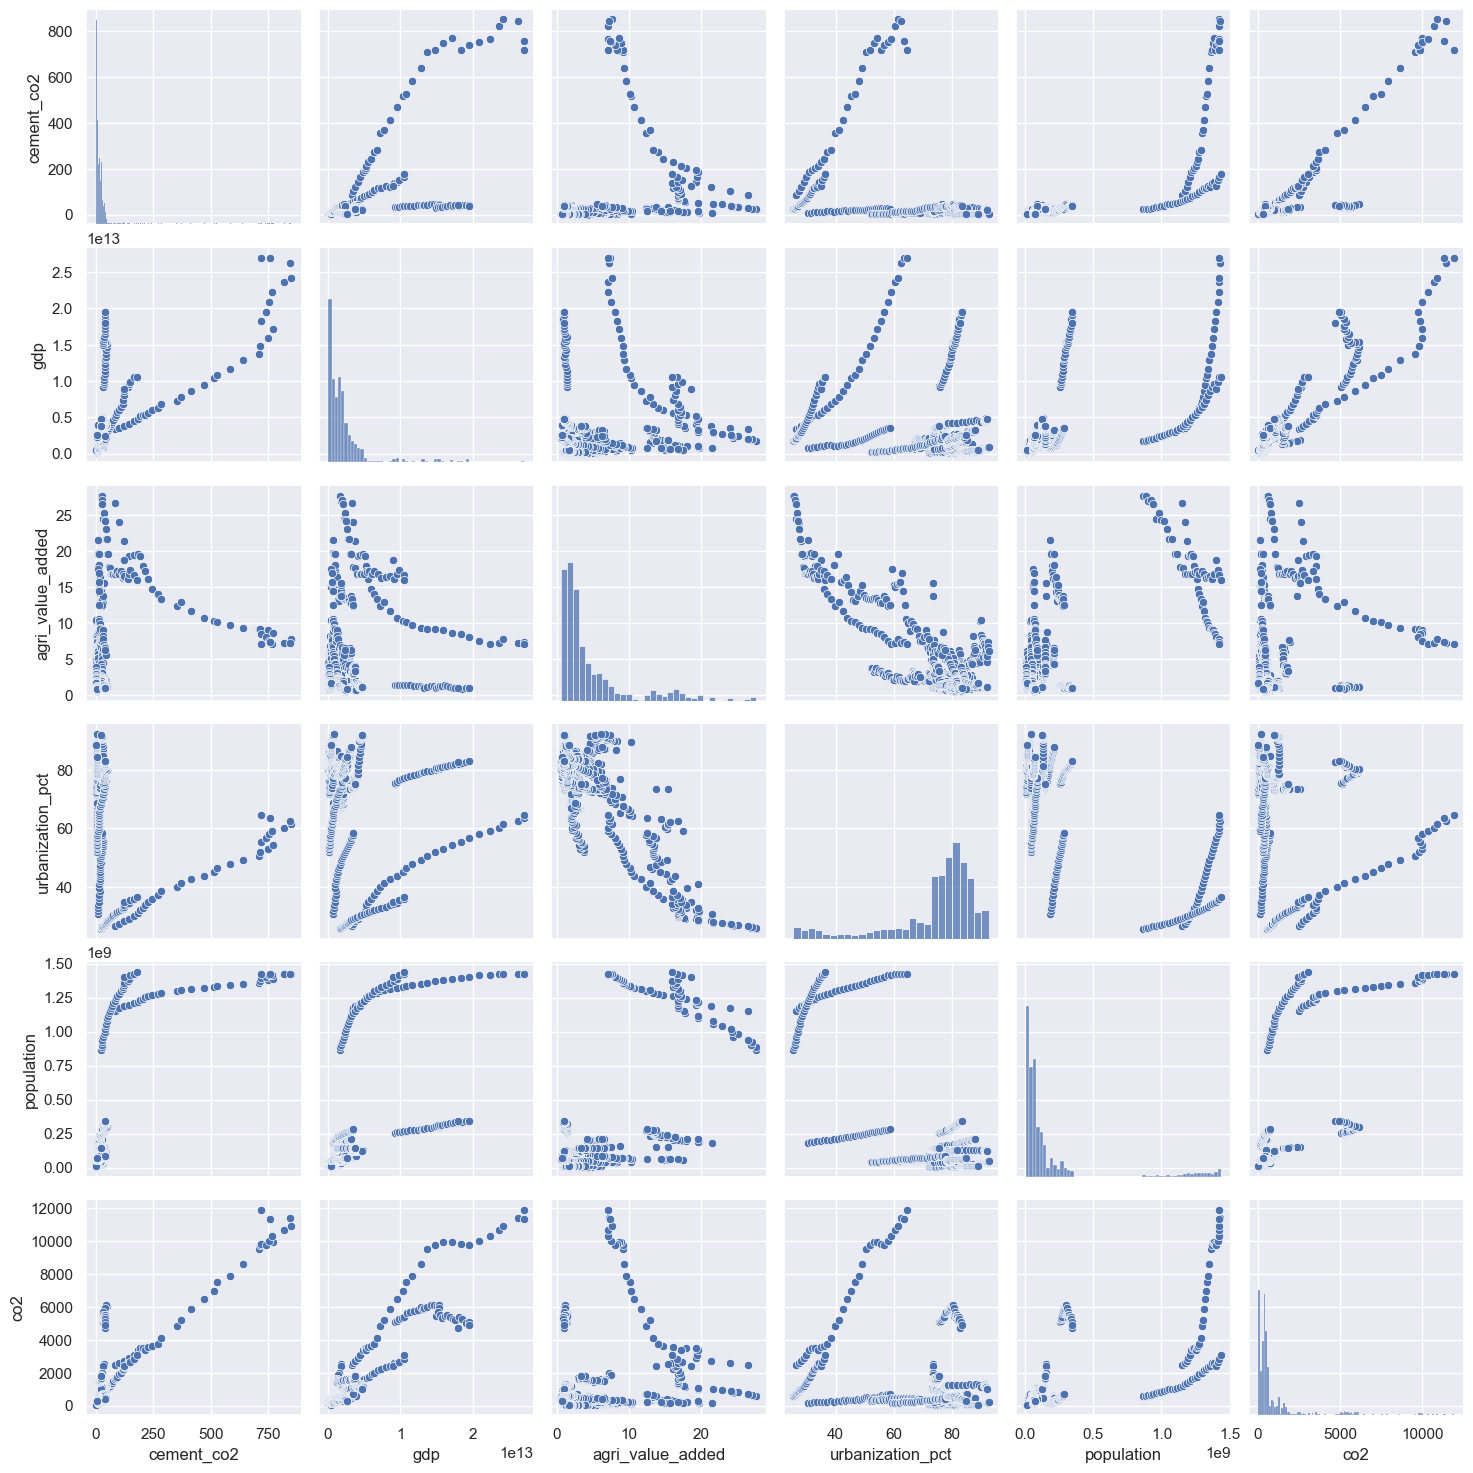

In [1561]:
sns.pairplot(df_co2[['cement_co2', 'gdp', 'agri_value_added', 'urbanization_pct', 'population', 'co2']])
plt.show()

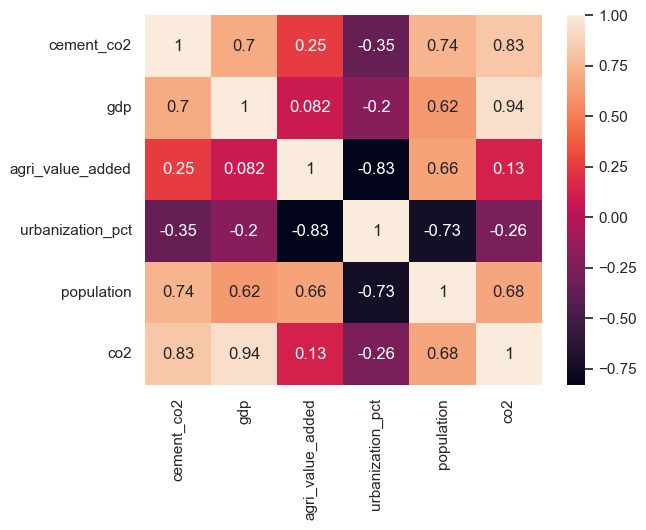

In [1562]:
sns.heatmap(df_co2[['cement_co2', 'gdp', 'agri_value_added', 'urbanization_pct', 'population', 'co2']].corr(), annot = True)
plt.show()

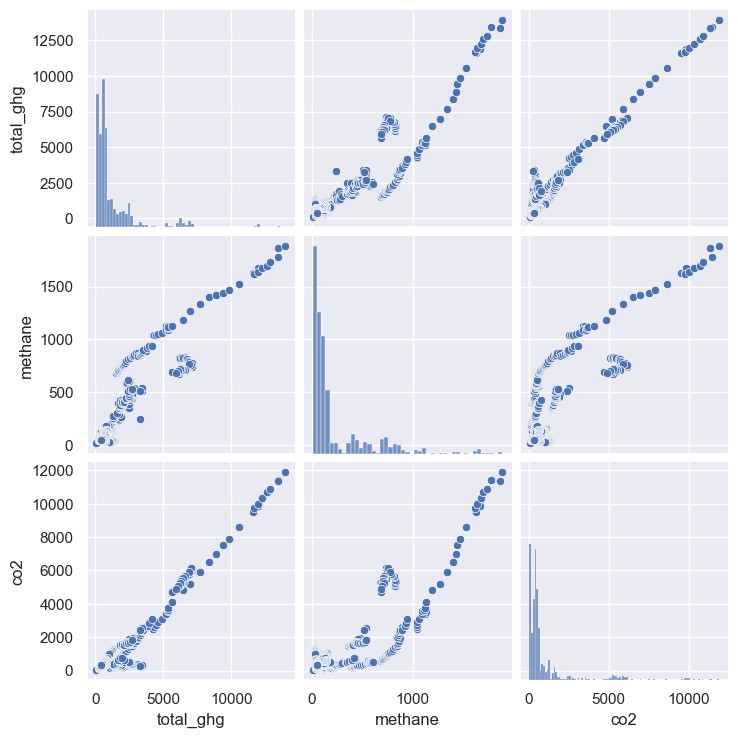

In [1568]:
sns.pairplot(df_co2[['total_ghg','methane' ,'co2']])
plt.show()

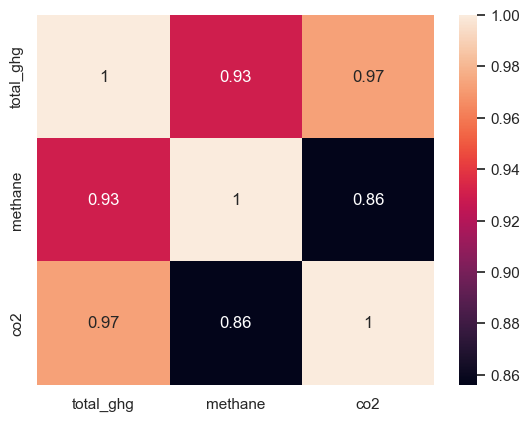

In [1569]:
sns.heatmap(df_co2[['total_ghg','methane' ,'co2']].corr(), annot = True)
plt.show()

In [1615]:
# import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [1574]:
df_co2.columns

Index(['country', 'year', 'population', 'energy_per_capita', 'oil_co2',
       'gas_co2', 'total_ghg', 'methane', 'cement_co2', 'co2', 'gdp',
       'renewable_energy_pct', 'Country Code', 'urbanization_pct',
       'agri_value_added'],
      dtype='object')

In [1576]:
df_co2.columns

Index(['country', 'year', 'population', 'energy_per_capita', 'oil_co2',
       'gas_co2', 'total_ghg', 'methane', 'cement_co2', 'co2', 'gdp',
       'renewable_energy_pct', 'Country Code', 'urbanization_pct',
       'agri_value_added'],
      dtype='object')

In [1577]:
from sklearn.feature_selection import mutual_info_regression
X_info = df_co2[['population', 'energy_per_capita', 'oil_co2', 'gas_co2', 
       'cement_co2', 'gdp', 'renewable_energy_pct',
       'urbanization_pct', 'agri_value_added']]
y_info = df_co2['co2']
MI = mutual_info_regression(X_info, y_info)


MI

array([2.01629236, 1.37923545, 1.85695748, 1.38531363, 1.6396083 ,
       1.4863836 , 1.15464272, 1.0918262 , 0.9188692 ])

In [1578]:
# Convert MI into Series to get importance value and name of the features
MI = pd.Series(MI)
MI.index = X_info.columns
MI.sort_values(ascending = False)

population              2.016292
oil_co2                 1.856957
cement_co2              1.639608
gdp                     1.486384
gas_co2                 1.385314
energy_per_capita       1.379235
renewable_energy_pct    1.154643
urbanization_pct        1.091826
agri_value_added        0.918869
dtype: float64

Plotting Information Gain values for Visualization

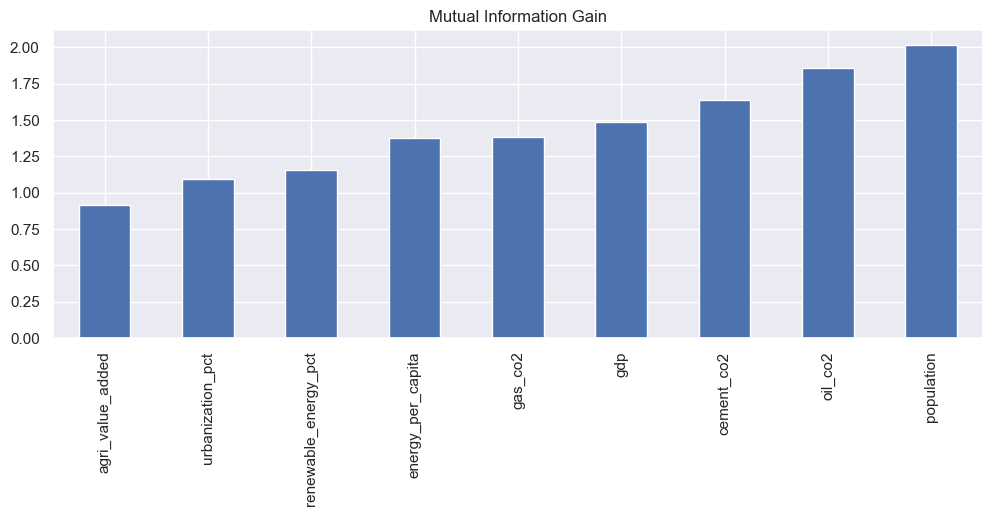

In [1579]:
MI.sort_values().plot(kind = 'bar', title = 'Mutual Information Gain', figsize = (12, 4))
plt.show()

High mutual information gain value for features such as population and oil_co2 despite low correlation values might be suggestive of non linear relationship between them and dependent variable co2 which is not captured by the correlation values because correlation only detects linear relationships between features.

In [1581]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_co2[['year', 'population', 'energy_per_capita', 'oil_co2', 'gas_co2',
       'cement_co2', 'gdp', 'renewable_energy_pct', 'urbanization_pct',
       'agri_value_added']]
y = df_co2['co2']

# Standardise the dataset for modelling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Log transformation of dependent variable for Linear Regression

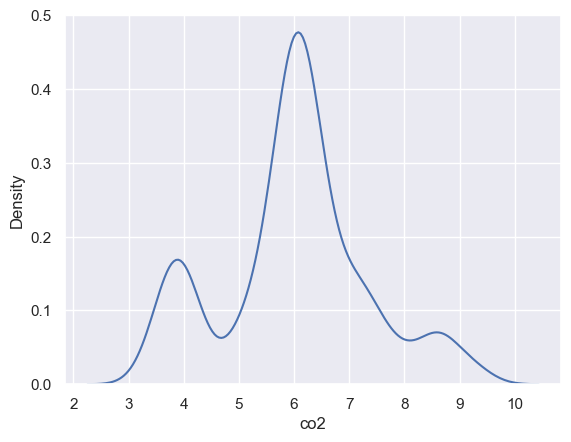

In [1582]:
# Normalizing target feature
from scipy import stats
y = np.log(y)
sns.kdeplot(y)
plt.show()

Log transform gdp feature as because of its very high scale as compared to other features it could inflate variance a lot

In [1583]:
X['log_gdp'] = np.log(df_co2['gdp'] + 1000)

C:\Users\Ashish Siwach\AppData\Local\Temp\ipykernel_10452\3350737140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['log_gdp'] = np.log(df_co2['gdp'] + 1000)


In [1584]:
X.drop('gdp', axis = 1, inplace = True)

C:\Users\Ashish Siwach\AppData\Local\Temp\ipykernel_10452\3365279288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('gdp', axis = 1, inplace = True)


In [1585]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [1586]:
year_train = X_train['year']
X_train.drop('year', axis = 1, inplace = True)
year_test = X_test['year']
X_test.drop('year', axis = 1, inplace = True)

In [1587]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_with_const = sm.add_constant(X_train)

vif_data = pd.DataFrame()
vif_data['Feature'] = ['const'] + list(X_train.columns)
vif_data['VIF'] = [variance_inflation_factor(X_with_const, i) for i in range(X_with_const.shape[1])]

# Display VIF
print(vif_data)


import statsmodels.api as sm
ols_model = sm.OLS(y_train, X_with_const).fit()
print(ols_model.summary())

                Feature          VIF
0                 const  2259.910603
1            population     8.563631
2     energy_per_capita     2.013541
3               oil_co2     6.174895
4               gas_co2     5.161699
5            cement_co2     3.285996
6  renewable_energy_pct     1.605863
7      urbanization_pct     4.186652
8      agri_value_added     4.679071
9               log_gdp     3.510490
                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1319.
Date:                Wed, 18 Dec 2024   Prob (F-statistic):               0.00
Time:                        22:12:39   Log-Likelihood:                -126.92
No. Observations:                 625   AIC:                             273.8
Df Residuals:                     615   

In [1613]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions using the fitted OLS model
y_pred = ols_model.predict(X_with_const)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_pred)

rmse = mse ** 0.5

# Calculate R-squared
r2 = r2_score(y_train, y_pred)

# Display the results in a table-like format
error_metrics = {
    'Mean Squared Error (MSE)': mse,
    'Mean Absolute Error (MAE)': mae,
    'Root Mean Squared Error (RMSE)': rmse,
    'R-squared': r2
}

# Print error metrics table
for metric, value in error_metrics.items():
    print(f"{metric}: {value:.4f}")

Mean Squared Error (MSE): 0.0879
Mean Absolute Error (MAE): 0.2323
Root Mean Squared Error (RMSE): 0.2965
R-squared: 0.9507


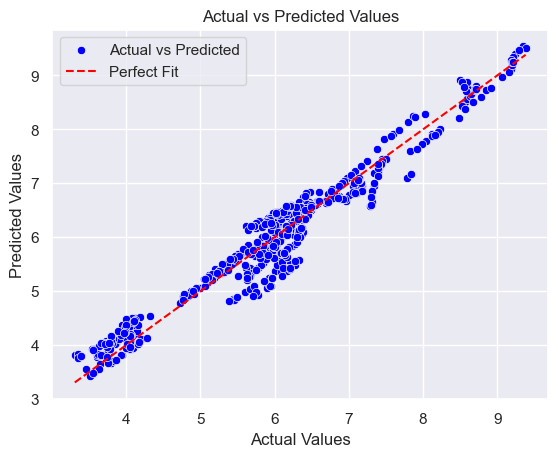

In [1588]:
# Scatter plot of actual values vs predicted values
# Predicted values
y_pred = ols_model.fittedvalues

# Residuals
residuals = y_train - y_pred
sns.scatterplot(x=y_train, y=y_pred, color='blue', label='Actual vs Predicted')

# Plotting the ideal line y = x (perfect fit)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--', label='Perfect Fit')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()

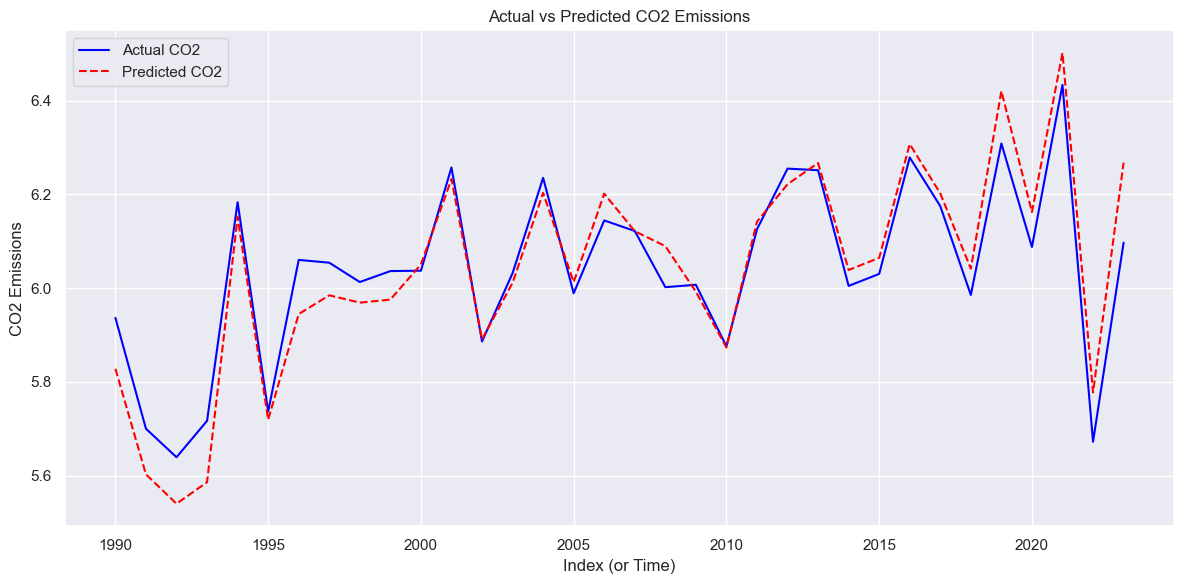

In [1596]:
# Plotting the Actual vs Predicted Values
plt.figure(figsize=(12, 6))

# Plot actual CO2 values
sns.lineplot(x = year_train, y = y_train, label='Actual CO2', color='blue', errorbar = None)

# Plot predicted CO2 values
sns.lineplot(x = year_train, y = y_pred, label='Predicted CO2', color='red', linestyle= '--', errorbar = None)

# Add labels, title, and legend
plt.xlabel('Index (or Time)')
plt.ylabel('CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### Relationship between co2 emissions and gdp

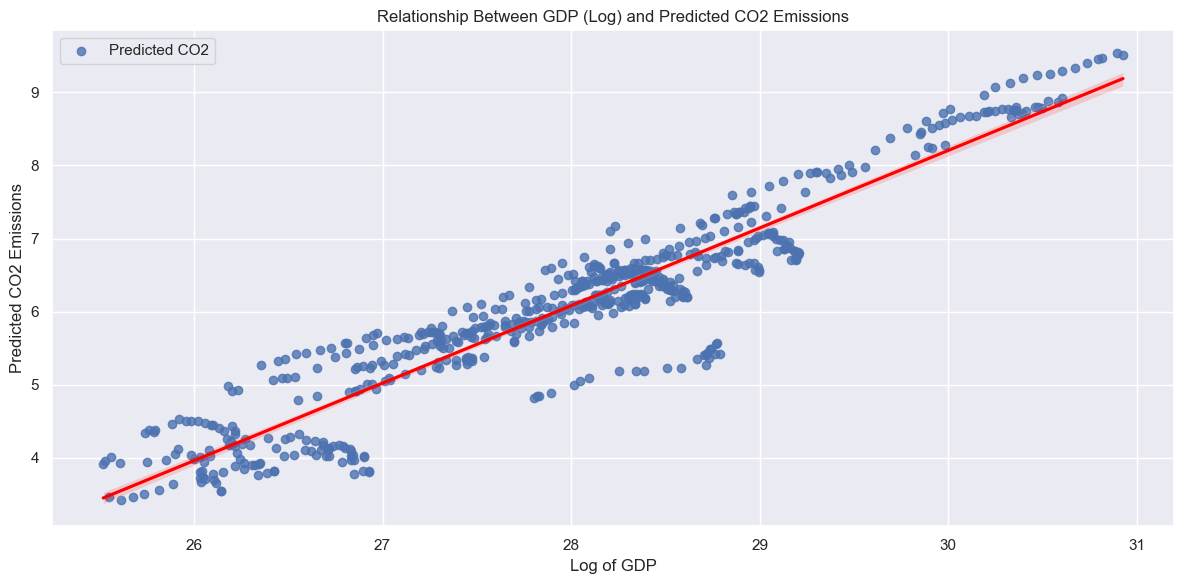

In [1608]:
# 1. Relationship Between GDP and Predicted CO2 Emissions
plt.figure(figsize=(12, 6))
sns.regplot(x=X_train['log_gdp'], y=y_pred, label='Predicted CO2', line_kws = {'color' : 'red'})
plt.title('Relationship Between GDP (Log) and Predicted CO2 Emissions')
plt.xlabel('Log of GDP')
plt.ylabel('Predicted CO2 Emissions')
plt.legend()
plt.tight_layout()
plt.show()

### Relationship between energy consumption and co2 emissions

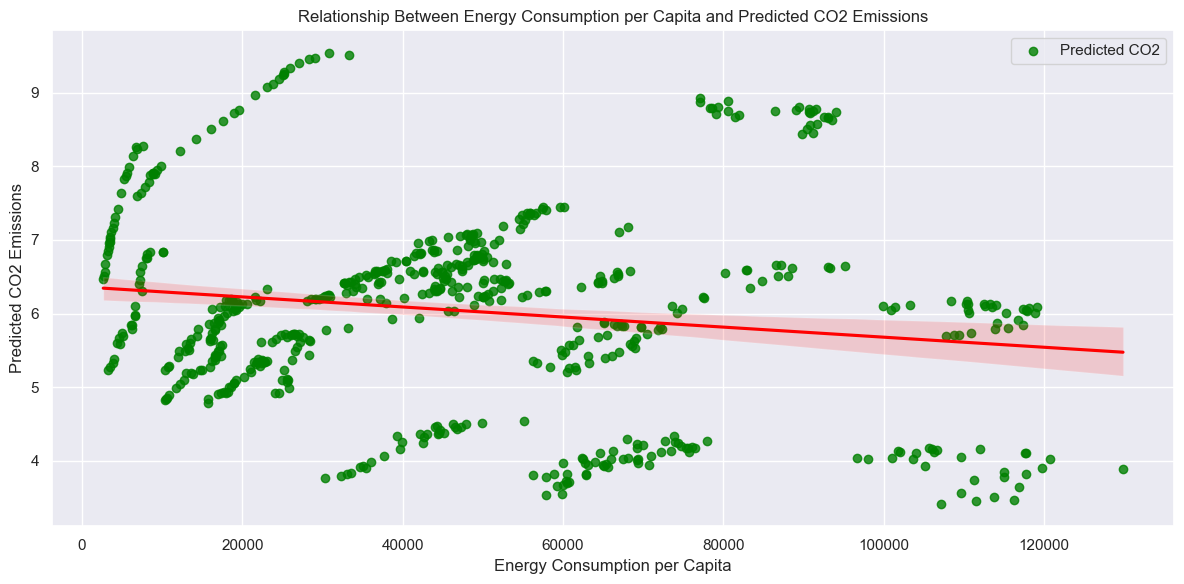

In [1614]:
plt.figure(figsize=(12, 6))
sns.regplot(x=X_train['energy_per_capita'], y=y_pred, color='green', label='Predicted CO2', line_kws = {'color' : 'red'})
plt.title('Relationship Between Energy Consumption per Capita and Predicted CO2 Emissions')
plt.xlabel('Energy Consumption per Capita')
plt.ylabel('Predicted CO2 Emissions')
plt.legend()
plt.tight_layout()
plt.show()

### Relation between co2 emissions and renweable energy

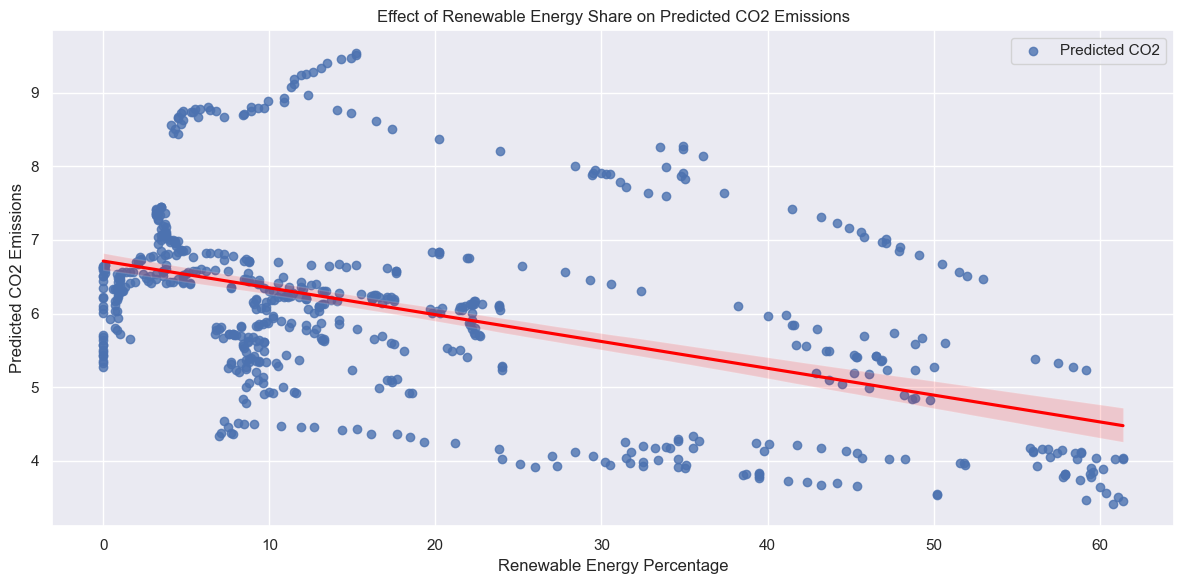

In [1604]:
plt.figure(figsize=(12, 6))
sns.regplot(x=X_train['renewable_energy_pct'], y=y_pred, label='Predicted CO2', line_kws = {'color' : 'red'})
plt.title('Effect of Renewable Energy Share on Predicted CO2 Emissions')
plt.xlabel('Renewable Energy Percentage')
plt.ylabel('Predicted CO2 Emissions')
plt.legend()
plt.tight_layout()
plt.show()

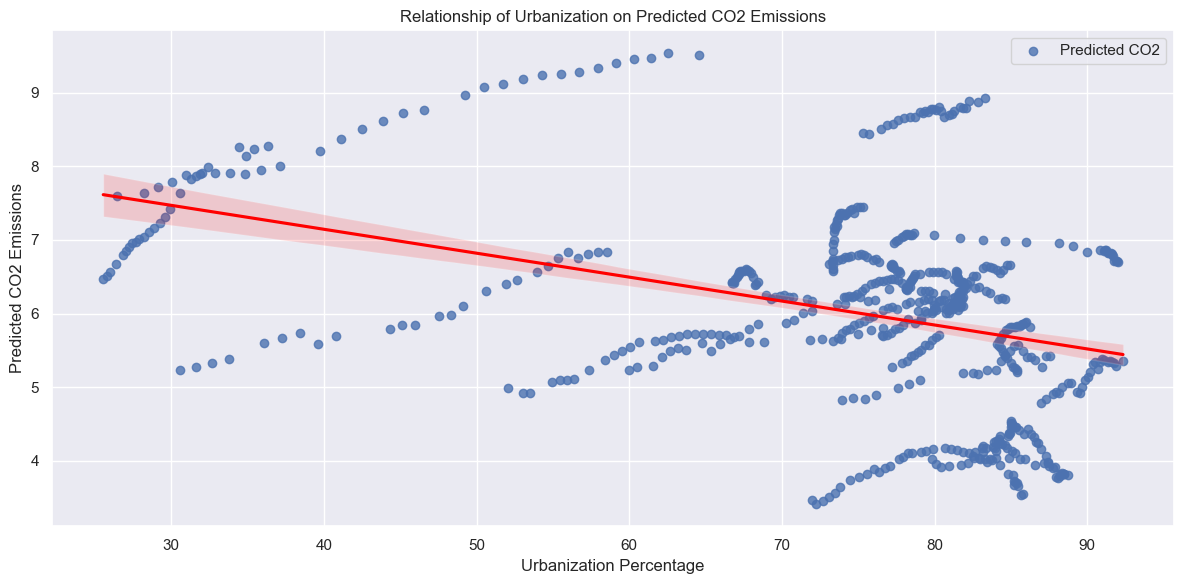

In [1606]:
plt.figure(figsize=(12, 6))
sns.regplot(x=X_train['urbanization_pct'], y=y_pred, label='Predicted CO2', line_kws = {'color' : 'red'})
plt.title('Relationship of Urbanization on Predicted CO2 Emissions')
plt.xlabel('Urbanization Percentage')
plt.ylabel('Predicted CO2 Emissions')
plt.legend()
plt.tight_layout()
plt.show()